<a href="https://colab.research.google.com/github/khanhtran94/LearnConda/blob/master/dl18_translaction_invariance_issue_with_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils

In [6]:
# kaggle.com/c/digit-recognizer/data
img_train = np.loadtxt("MNIST_digit_train.csv", delimiter=',', skiprows=1)[:,:]
print("training data: {0}".format(img_train.shape))
X_train = np.array(img_train[:,1:])
train_label = np.array(img_train[:,0])

print(X_train.shape)
print(train_label.shape)

training data: (42000, 785)
(42000, 784)
(42000,)


(42000, 10)
(42000, 784)


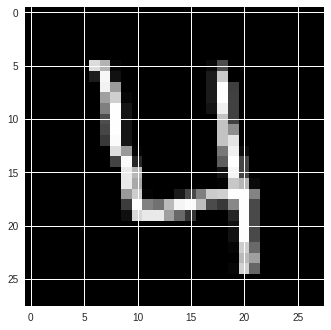

In [7]:
# rescaling of the data
# as data is already float 64 and np so no need to use type conversion astype
X_train_1 = X_train/255
Y_train = np_utils.to_categorical(train_label)
print(Y_train.shape)
print(X_train_1.shape)
plt.imshow(X_train_1[3].reshape(28,28), cmap='gray')
plt.show()


In [0]:
for i in range(10):
  plt.imshow(X_train_1[i].reshape(28,28), cmap='gray')
  plt.show()

In [0]:
#define the placeholder
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10]) # 0..9

#create a neural network of single layer having 1000 nodes using tensoflow api
n_hidden = 1000
n_output = 10 # same as class
learning_rate = 0.1

# network model

Z1 = tf.layers.dense(X, n_hidden, activation = tf.nn.relu)
output_layer = tf.layers.dense(Z1, n_output, activation = tf.nn.softmax)

#define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

#define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(computed_loss)

# define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

#init
init = tf.global_variables_initializer()


(4072, 784)


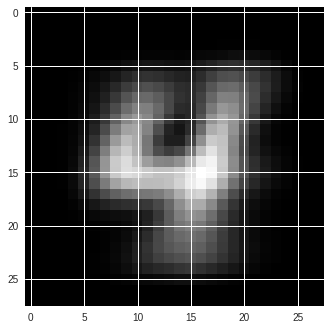

In [13]:
X_train_2 = X_train_1[train_label == 4]
print(X_train_2.shape)

# test img
X_train_reshape = X_train_2.reshape(-1,28,28)
pic = np.zeros((28,28))

pic2 = np.copy(pic)

for i in range(X_train_reshape.shape[0]):
  pic2 = X_train_reshape[i,:,:]
  pic = pic + pic2
test_image = (pic/ X_train_reshape.shape[0])
plt.imshow(test_image, cmap = 'gray')
plt.show()

In [14]:
# run ss
sess = tf.Session()
sess.run(init)

for i in range(500):
  gh,lossy = sess.run([optimizer, computed_loss], feed_dict = {X: X_train_1, Y: Y_train})
  if i%100 == 0:
    print("Loss at {2}/{1}  :  {0}".format(lossy,500,i))
    
#reshape test img to feed into network

test_image_reshape = test_image.reshape(1,784)
Z = sess.run(output_layer, feed_dict = {X:test_image_reshape})

y_pred = np.argmax(Z, axis = 1)
print("Prediction for test image is {0}".format(y_pred))

Loss at 0/500  :  2.3026747703552246
Loss at 100/500  :  1.9604731798171997
Loss at 200/500  :  1.800895094871521
Loss at 300/500  :  1.75648033618927
Loss at 400/500  :  1.6723792552947998
Prediction for test image is [4]


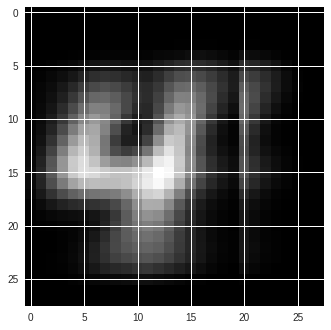

prediction for test image is [4]


In [22]:
# shift the image to left by 4 units
test_image_2 = test_image

for i in range(test_image.shape[0]):
  if i<20:
    test_image_2[:,i] = test_image[:,i+4]
    test_image_2 = np.clip(test_image_2,0,1.0)
plt.imshow(test_image_2, cmap='gray')
plt.show()

#test the translated image

#reshape test image to feed into network

test_image_reshpae = test_image_2.reshape(1,784)

Z = sess.run(output_layer, feed_dict = {X: test_image_reshape})
y_pred = np.argmax(Z, axis = 1)

print("prediction for test image is {0}".format(y_pred))